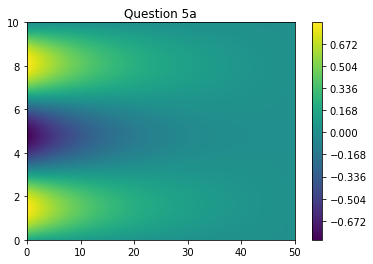

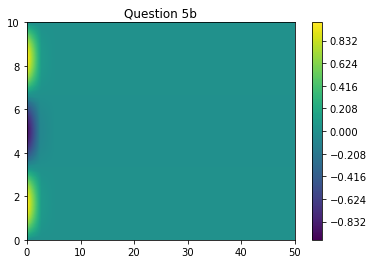

In [13]:
import numpy as np
from numpy import sin, pi, sinh, exp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import quad


#create grid of xy points
Nx = 20
Ny = 50

xv = np.linspace(0, 50, Nx)
yv = np.linspace(0, 10, Ny)

X, Y = np.meshgrid(xv, yv)

# initialise our matrix of potential V with random values
# note: we add one row and one column to apply the boundary conditions
# which makes it easier to iterate only within the region of interest
V = np.random.rand(Ny+1, Nx+1)

#Boundary Conditions
V[0,:] = 0.0
V[Ny,:] = 0.0

V[:-1,0] = sin(3*pi*yv/10)
V[:,Nx] = 0

# relaxation method
# iteratively replace value at point by average of four neighbours

Niter = 200
for it in range(1, Niter):
    for ix in range(1, Nx):
        for iy in range(1, Ny):
            V[iy, ix] = 0.25*(V[iy+1, ix] + V[iy-1, ix] + V[iy, ix+1] + V[iy, ix-1])

con = plt.contourf(X,Y,V[1:,1:], levels=300)
# con = plt.imshow(V, extent=[0, 50, 0, 10], origin='lower', cmap=cm.gray)
plt.title('Question 5a')
plt.colorbar()
plt.show()


V_true = exp(-3*pi*X/10)*sin(3*pi*Y/10)

con2 = plt.contourf(X,Y,V_true,levels=300)
plt.title('Question 5b')
plt.colorbar()
plt.show()